In [5]:
import pandas as pd
import numpy as np
from tkinter import *
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

data=pd.read_csv('food.csv')
Breakfastdata=data['Breakfast']
BreakfastdataNumpy=Breakfastdata.to_numpy()
    
Lunchdata=data['Lunch']
LunchdataNumpy=Lunchdata.to_numpy()
    
Dinnerdata=data['Dinner']
DinnerdataNumpy=Dinnerdata.to_numpy()
Food_itemsdata=data['Food_items']



def show_entry_fields():
    print("\n Age: %s\n Veg-NonVeg: %s\n Weight: %s kg\n Hight: %s cm\n" % (e1.get(), e2.get(),e3.get(), e4.get()))


def Weight_Loss():
    show_entry_fields()
    
    breakfastfoodseparated=[]
    Lunchfoodseparated=[]
    Dinnerfoodseparated=[]
        
    breakfastfoodseparatedID=[]
    LunchfoodseparatedID=[]
    DinnerfoodseparatedID=[]
        
    for i in range(len(Breakfastdata)):
        if BreakfastdataNumpy[i]==1:
            breakfastfoodseparated.append( Food_itemsdata[i] )
            breakfastfoodseparatedID.append(i)
        if LunchdataNumpy[i]==1:
            Lunchfoodseparated.append(Food_itemsdata[i])
            LunchfoodseparatedID.append(i)
        if DinnerdataNumpy[i]==1:
            Dinnerfoodseparated.append(Food_itemsdata[i])
            DinnerfoodseparatedID.append(i)
        
    # retrieving Lunch data rows by loc method |
    LunchfoodseparatedIDdata = data.iloc[LunchfoodseparatedID]
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.T
    #print(LunchfoodseparatedIDdata)
    val=list(np.arange(5,15))
    Valapnd=[0]+val
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.iloc[Valapnd]
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.T
    #print(LunchfoodseparatedIDdata)

    # retrieving Breafast data rows by loc method 
    breakfastfoodseparatedIDdata = data.iloc[breakfastfoodseparatedID]
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T
    val=list(np.arange(5,15))
    Valapnd=[0]+val
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.iloc[Valapnd]
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T
        
        
    # retrieving Dinner Data rows by loc method 
    DinnerfoodseparatedIDdata = data.iloc[DinnerfoodseparatedID]
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.T
    val=list(np.arange(5,15))
    Valapnd=[0]+val
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.iloc[Valapnd]
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.T
        
    #calculating BMI
    age=int(e1.get())
    veg=float(e2.get())
    weight=float(e3.get())
    height=float(e4.get())
    bmi = weight/((height/100)**2) 
    agewiseinp=0
        
    for lp in range (0,80,20):
        test_list=np.arange(lp,lp+20)
        for i in test_list: 
            if(i == age):
                tr=round(lp/20)  
                agecl=round(lp/20)    

        
    #conditions
    print("Your body mass index is: ", bmi)
    if ( bmi < 16):
        print("Acoording to your BMI, you are Severely Underweight")
        clbmi=4
    elif ( bmi >= 16 and bmi < 18.5):
        print("Acoording to your BMI, you are Underweight")
        clbmi=3
    elif ( bmi >= 18.5 and bmi < 25):
        print("Acoording to your BMI, you are Healthy")
        clbmi=2
    elif ( bmi >= 25 and bmi < 30):
        print("Acoording to your BMI, you are Overweight")
        clbmi=1
    elif ( bmi >=30):
        print("Acoording to your BMI, you are Severely Overweight")
        clbmi=0

    #converting into numpy array
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.to_numpy()
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.to_numpy()
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.to_numpy()
    ti=(clbmi+agecl)/2
    
    ## K-Means Based  Dinner Food
    Datacalorie=DinnerfoodseparatedIDdata[1:,1:len(DinnerfoodseparatedIDdata)]

    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

    XValu=np.arange(0,len(kmeans.labels_))
    
    # retrieving the labels for dinner food
    dnrlbl=kmeans.labels_

    ## K-Means Based  lunch Food
    Datacalorie=LunchfoodseparatedIDdata[1:,1:len(LunchfoodseparatedIDdata)]
    
    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    
    XValu=np.arange(0,len(kmeans.labels_))
    
    # retrieving the labels for lunch food
    lnchlbl=kmeans.labels_
    
    ## K-Means Based  lunch Food
    Datacalorie=breakfastfoodseparatedIDdata[1:,1:len(breakfastfoodseparatedIDdata)]
    
    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    
    XValu=np.arange(0,len(kmeans.labels_))
    
    # retrieving the labels for breakfast food
    brklbl=kmeans.labels_
    
    inp=[]
    ## Reading of the Dataet
    datafin=pd.read_csv('nutrition_distriution.csv')

    ## train set
    dataTog=datafin.T
    bmicls=[0,1,2,3,4]
    agecls=[0,1,2,3,4]
    weightlosscat = dataTog.iloc[[1,2,7,8]]
    weightlosscat=weightlosscat.T
    weightgaincat= dataTog.iloc[[0,1,2,3,4,7,9,10]]
    weightgaincat=weightgaincat.T
    healthycat = dataTog.iloc[[1,2,3,4,6,7,9]]
    healthycat=healthycat.T
    weightlosscatDdata=weightlosscat.to_numpy()
    weightgaincatDdata=weightgaincat.to_numpy()
    healthycatDdata=healthycat.to_numpy()
    weightlosscat=weightlosscatDdata[1:,0:len(weightlosscatDdata)]
    weightgaincat=weightgaincatDdata[1:,0:len(weightgaincatDdata)]
    healthycat=healthycatDdata[1:,0:len(healthycatDdata)]
    
    
    weightlossfin=np.zeros((len(weightlosscat)*5,6),dtype=np.float32)
    weightgainfin=np.zeros((len(weightgaincat)*5,10),dtype=np.float32)
    healthycatfin=np.zeros((len(healthycat)*5,9),dtype=np.float32)
    t=0
    r=0
    s=0
    yt=[]
    yr=[]
    ys=[]
    for zz in range(5):
        for jj in range(len(weightlosscat)):
            valloc=list(weightlosscat[jj])
            valloc.append(bmicls[zz])
            valloc.append(agecls[zz])
            weightlossfin[t]=np.array(valloc)
            yt.append(brklbl[jj])
            t+=1
        for jj in range(len(weightgaincat)):
            valloc=list(weightgaincat[jj])
            valloc.append(bmicls[zz])
            valloc.append(agecls[zz])
            weightgainfin[r]=np.array(valloc)
            yr.append(lnchlbl[jj])
            r+=1
        for jj in range(len(healthycat)):
            valloc=list(healthycat[jj])
            valloc.append(bmicls[zz])
            valloc.append(agecls[zz])
            healthycatfin[s]=np.array(valloc)
            ys.append(dnrlbl[jj])
            s+=1

    
    X_test=np.zeros((len(weightlosscat),6),dtype=np.float32)

    print('####################')
    
    #randomforest
    for jj in range(len(weightlosscat)):
        valloc=list(weightlosscat[jj])
        valloc.append(agecl)
        valloc.append(clbmi)
        X_test[jj]=np.array(valloc)*ti
    
    
    
    X_train=weightlossfin# Features
    y_train=yt # Labels

    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)
    
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)
    
    #print (X_test[1])
    X_test2=X_test
    y_pred=clf.predict(X_test)
    
    
    print ('SUGGESTED FOOD ITEMS ::')
    for ii in range(len(y_pred)):
        if y_pred[ii]==2:     #weightloss
            print (Food_itemsdata[ii])
            findata=Food_itemsdata[ii]
            if int(veg)==1:
                datanv=['Chicken Burger']
                for it in range(len(datanv)):
                    if findata==datanv[it]:
                        print('VegNovVeg')

    print('\n Thank You for taking our recommendations. :)')




def Weight_Gain():
    show_entry_fields()

    breakfastfoodseparated=[]
    Lunchfoodseparated=[]
    Dinnerfoodseparated=[]
        
    breakfastfoodseparatedID=[]
    LunchfoodseparatedID=[]
    DinnerfoodseparatedID=[]
        
    for i in range(len(Breakfastdata)):
        if BreakfastdataNumpy[i]==1:
            breakfastfoodseparated.append( Food_itemsdata[i] )
            breakfastfoodseparatedID.append(i)
        if LunchdataNumpy[i]==1:
            Lunchfoodseparated.append(Food_itemsdata[i])
            LunchfoodseparatedID.append(i)
        if DinnerdataNumpy[i]==1:
            Dinnerfoodseparated.append(Food_itemsdata[i])
            DinnerfoodseparatedID.append(i)
        
    # retrieving rows by loc method |
    LunchfoodseparatedIDdata = data.iloc[LunchfoodseparatedID]
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.T
    val=list(np.arange(5,15))
    Valapnd=[0]+val
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.iloc[Valapnd]
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.T
        
    # retrieving rows by loc method 
    breakfastfoodseparatedIDdata = data.iloc[breakfastfoodseparatedID]
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T
    val=list(np.arange(5,15))
    Valapnd=[0]+val
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.iloc[Valapnd]
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T
        
        
    # retrieving rows by loc method 
    DinnerfoodseparatedIDdata = data.iloc[DinnerfoodseparatedID]
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.T
    val=list(np.arange(5,15))
    Valapnd=[0]+val
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.iloc[Valapnd]
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.T
        
    #claculating BMI
    age=int(e1.get())
    veg=float(e2.get())
    weight=float(e3.get())
    height=float(e4.get())
    bmi = weight/((height/100)**2)        

    for lp in range (0,80,20):
        test_list=np.arange(lp,lp+20)
        for i in test_list: 
            if(i == age):
                tr=round(lp/20)  
                agecl=round(lp/20)

    print("Your body mass index is: ", bmi)
    if ( bmi < 16):
        print("Acoording to your BMI, you are Severely Underweight")
        clbmi=4
    elif ( bmi >= 16 and bmi < 18.5):
        print("Acoording to your BMI, you are Underweight")
        clbmi=3
    elif ( bmi >= 18.5 and bmi < 25):
        print("Acoording to your BMI, you are Healthy")
        clbmi=2
    elif ( bmi >= 25 and bmi < 30):
        print("Acoording to your BMI, you are Overweight")
        clbmi=1
    elif ( bmi >=30):
        print("Acoording to your BMI, you are Severely Overweight")
        clbmi=0


    
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.to_numpy()
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.to_numpy()
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.to_numpy()
    ti=(bmi+agecl)/2
    
    
    ## K-Means Based  Dinner Food
    Datacalorie=DinnerfoodseparatedIDdata[1:,1:len(DinnerfoodseparatedIDdata)]
    
    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    
    XValu=np.arange(0,len(kmeans.labels_))
    # plt.bar(XValu,kmeans.labels_)
    dnrlbl=kmeans.labels_
    # plt.title("Predicted Low-High Weigted Calorie Foods")
    
    ## K-Means Based  lunch Food
    Datacalorie=LunchfoodseparatedIDdata[1:,1:len(LunchfoodseparatedIDdata)]
    
    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    
    XValu=np.arange(0,len(kmeans.labels_))
    # fig,axs=plt.subplots(1,1,figsize=(15,5))
    # plt.bar(XValu,kmeans.labels_)
    lnchlbl=kmeans.labels_
    # plt.title("Predicted Low-High Weigted Calorie Foods")
    
    ## K-Means Based  lunch Food
    Datacalorie=breakfastfoodseparatedIDdata[1:,1:len(breakfastfoodseparatedIDdata)]

    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    
    XValu=np.arange(0,len(kmeans.labels_))
    # fig,axs=plt.subplots(1,1,figsize=(15,5))
    # plt.bar(XValu,kmeans.labels_)
    brklbl=kmeans.labels_
    
    # plt.title("Predicted Low-High Weigted Calorie Foods")
    inp=[]
    ## Reading of the Dataet
    datafin=pd.read_csv('nutrition_distriution.csv')
    datafin.head(5)
    
    dataTog=datafin.T
    bmicls=[0,1,2,3,4]
    agecls=[0,1,2,3,4]
    weightlosscat = dataTog.iloc[[1,2,7,8]]
    weightlosscat=weightlosscat.T
    weightgaincat= dataTog.iloc[[0,1,2,3,4,7,9,10]]
    weightgaincat=weightgaincat.T
    healthycat = dataTog.iloc[[1,2,3,4,6,7,9]]
    healthycat=healthycat.T
    weightlosscatDdata=weightlosscat.to_numpy()
    weightgaincatDdata=weightgaincat.to_numpy()
    healthycatDdata=healthycat.to_numpy()
    weightlosscat=weightlosscatDdata[1:,0:len(weightlosscatDdata)]
    weightgaincat=weightgaincatDdata[1:,0:len(weightgaincatDdata)]
    healthycat=healthycatDdata[1:,0:len(healthycatDdata)]
    
   
    weightlossfin=np.zeros((len(weightlosscat)*5,6),dtype=np.float32)
    weightgainfin=np.zeros((len(weightgaincat)*5,10),dtype=np.float32)
    healthycatfin=np.zeros((len(healthycat)*5,9),dtype=np.float32)
    t=0
    r=0
    s=0
    yt=[]
    yr=[]
    ys=[]
    for zz in range(5):
        for jj in range(len(weightlosscat)):
            valloc=list(weightlosscat[jj])
            valloc.append(bmicls[zz])
            valloc.append(agecls[zz])
            weightlossfin[t]=np.array(valloc)
            yt.append(brklbl[jj])
            t+=1
        for jj in range(len(weightgaincat)):
            valloc=list(weightgaincat[jj])
            #print (valloc)
            valloc.append(bmicls[zz])
            valloc.append(agecls[zz])
            weightgainfin[r]=np.array(valloc)
            yr.append(lnchlbl[jj])
            r+=1
        for jj in range(len(healthycat)):
            valloc=list(healthycat[jj])
            valloc.append(bmicls[zz])
            valloc.append(agecls[zz])
            healthycatfin[s]=np.array(valloc)
            ys.append(dnrlbl[jj])
            s+=1

    
    X_test=np.zeros((len(weightgaincat),10),dtype=np.float32)

    print('####################')
    # In[287]:
    for jj in range(len(weightgaincat)):
        valloc=list(weightgaincat[jj])
        valloc.append(agecl)
        valloc.append(clbmi)
        X_test[jj]=np.array(valloc)*ti
    
    
    X_train=weightgainfin# Features
    y_train=yr # Labels
    
   
    
    
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)
    
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)
    
   
    X_test2=X_test
    y_pred=clf.predict(X_test)
    
    
    
    print ('SUGGESTED FOOD ITEMS ::')
    for ii in range(len(y_pred)):
        if y_pred[ii]==2:
            print (Food_itemsdata[ii])
            findata=Food_itemsdata[ii]
            if int(veg)==1:
                datanv=['Chicken Burger']
                for it in range(len(datanv)):
                    if findata==datanv[it]:
                        print('VegNovVeg')

    print('\n Thank You for taking our recommendations. :)')



def Healthy():
    show_entry_fields()

    breakfastfoodseparated=[]
    Lunchfoodseparated=[]
    Dinnerfoodseparated=[]
        
    breakfastfoodseparatedID=[]
    LunchfoodseparatedID=[]
    DinnerfoodseparatedID=[]
        
    for i in range(len(Breakfastdata)):
        if BreakfastdataNumpy[i]==1:
            breakfastfoodseparated.append( Food_itemsdata[i] )
            breakfastfoodseparatedID.append(i)
        if LunchdataNumpy[i]==1:
            Lunchfoodseparated.append(Food_itemsdata[i])
            LunchfoodseparatedID.append(i)
        if DinnerdataNumpy[i]==1:
            Dinnerfoodseparated.append(Food_itemsdata[i])
            DinnerfoodseparatedID.append(i)
        
    # retrieving rows by loc method |
    LunchfoodseparatedIDdata = data.iloc[LunchfoodseparatedID]
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.T
    val=list(np.arange(5,15))
    Valapnd=[0]+val
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.iloc[Valapnd]
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.T
        
    # retrieving rows by loc method 
    breakfastfoodseparatedIDdata = data.iloc[breakfastfoodseparatedID]
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T
    val=list(np.arange(5,15))
    Valapnd=[0]+val
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.iloc[Valapnd]
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T
        
        
    # retrieving rows by loc method 
    DinnerfoodseparatedIDdata = data.iloc[DinnerfoodseparatedID]
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.T
    val=list(np.arange(5,15))
    Valapnd=[0]+val
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.iloc[Valapnd]
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.T
        
    
    age=int(e1.get())
    veg=float(e2.get())
    weight=float(e3.get())
    height=float(e4.get())
    bmi = weight/((height/100)**2) 
    agewiseinp=0
        
    for lp in range (0,80,20):
        test_list=np.arange(lp,lp+20)
        for i in test_list: 
            if(i == age):
                tr=round(lp/20)  
                agecl=round(lp/20)    

        
    #conditions
    print("Your body mass index is: ", bmi)
    if ( bmi < 16):
        print("Acoording to your BMI, you are Severely Underweight")
        clbmi=4
    elif ( bmi >= 16 and bmi < 18.5):
        print("Acoording to your BMI, you are Underweight")
        clbmi=3
    elif ( bmi >= 18.5 and bmi < 25):
        print("Acoording to your BMI, you are Healthy")
        clbmi=2
    elif ( bmi >= 25 and bmi < 30):
        print("Acoording to your BMI, you are Overweight")
        clbmi=1
    elif ( bmi >=30):
        print("Acoording to your BMI, you are Severely Overweight")
        clbmi=0

    
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.to_numpy()
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.to_numpy()
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.to_numpy()
    ti=(bmi+agecl)/2
    
    

    Datacalorie=DinnerfoodseparatedIDdata[1:,1:len(DinnerfoodseparatedIDdata)]
    
    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    
    XValu=np.arange(0,len(kmeans.labels_))
    # fig,axs=plt.subplots(1,1,figsize=(15,5))
    # plt.bar(XValu,kmeans.labels_)
    dnrlbl=kmeans.labels_
    # plt.title("Predicted Low-High Weigted Calorie Foods")
    
    Datacalorie=LunchfoodseparatedIDdata[1:,1:len(LunchfoodseparatedIDdata)]
    
    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    #print ('## Prediction Result ##')
    #print(kmeans.labels_)
    XValu=np.arange(0,len(kmeans.labels_))
    # fig,axs=plt.subplots(1,1,figsize=(15,5))
    # plt.bar(XValu,kmeans.labels_)
    lnchlbl=kmeans.labels_
    # plt.title("Predicted Low-High Weigted Calorie Foods")
   
    Datacalorie=breakfastfoodseparatedIDdata[1:,1:len(breakfastfoodseparatedIDdata)]
    
    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    
    XValu=np.arange(0,len(kmeans.labels_))
    # fig,axs=plt.subplots(1,1,figsize=(15,5))
    # plt.bar(XValu,kmeans.labels_)
    brklbl=kmeans.labels_
    # print (len(brklbl))
    # plt.title("Predicted Low-High Weigted Calorie Foods")
    inp=[]
    ## Reading of the Dataet
    datafin=pd.read_csv('nutrition_distriution.csv')
    datafin.head(5)
   
    dataTog=datafin.T
    bmicls=[0,1,2,3,4]
    agecls=[0,1,2,3,4]
    weightlosscat = dataTog.iloc[[1,2,7,8]]
    weightlosscat=weightlosscat.T
    weightgaincat= dataTog.iloc[[0,1,2,3,4,7,9,10]]
    weightgaincat=weightgaincat.T
    healthycat = dataTog.iloc[[1,2,3,4,6,7,9]]
    healthycat=healthycat.T
    weightlosscatDdata=weightlosscat.to_numpy()
    weightgaincatDdata=weightgaincat.to_numpy()
    healthycatDdata=healthycat.to_numpy()
    weightlosscat=weightlosscatDdata[1:,0:len(weightlosscatDdata)]
    weightgaincat=weightgaincatDdata[1:,0:len(weightgaincatDdata)]
    healthycat=healthycatDdata[1:,0:len(healthycatDdata)]
    
    
    weightlossfin=np.zeros((len(weightlosscat)*5,6),dtype=np.float32)
    weightgainfin=np.zeros((len(weightgaincat)*5,10),dtype=np.float32)
    healthycatfin=np.zeros((len(healthycat)*5,9),dtype=np.float32)
    t=0
    r=0
    s=0
    yt=[]
    yr=[]
    ys=[]
    for zz in range(5):
        for jj in range(len(weightlosscat)):
            valloc=list(weightlosscat[jj])
            valloc.append(bmicls[zz])
            valloc.append(agecls[zz])
            weightlossfin[t]=np.array(valloc)
            yt.append(brklbl[jj])
            t+=1
        for jj in range(len(weightgaincat)):
            valloc=list(weightgaincat[jj])
            #print (valloc)
            valloc.append(bmicls[zz])
            valloc.append(agecls[zz])
            weightgainfin[r]=np.array(valloc)
            yr.append(lnchlbl[jj])
            r+=1
        for jj in range(len(healthycat)):
            valloc=list(healthycat[jj])
            valloc.append(bmicls[zz])
            valloc.append(agecls[zz])
            healthycatfin[s]=np.array(valloc)
            ys.append(dnrlbl[jj])
            s+=1

    X_test=np.zeros((len(healthycat)*5,9),dtype=np.float32)
    
    for jj in range(len(healthycat)):
        valloc=list(healthycat[jj])
        valloc.append(agecl)
        valloc.append(clbmi)
        X_test[jj]=np.array(valloc)*ti
    
    
    X_train=healthycatfin# Features
    y_train=ys # Labels
    
    
    
    
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)
    
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)
    
    
    X_test2=X_test
    y_pred=clf.predict(X_test)
   
    
    
    
    print ('SUGGESTED FOOD ITEMS ::')
    for ii in range(len(y_pred)):
        if y_pred[ii]==2:
            print (Food_itemsdata[ii])
            findata=Food_itemsdata[ii]
            if int(veg)==1:
                datanv=['Chicken Burger']

    print('\n Thank You for taking our recommendations. :)')

if __name__ == '__main__':
    main_win = Tk()
    
    Label(main_win,text="Age").grid(row=0,column=0,sticky=W,pady=4)
    Label(main_win,text="veg/Non veg (1/0)").grid(row=1,column=0,sticky=W,pady=4)
    Label(main_win,text="Weight (in kg)").grid(row=2,column=0,sticky=W,pady=4)
    Label(main_win,text="Height (in cm)").grid(row=3,column=0,sticky=W,pady=4)

    e1 = Entry(main_win)
    e2 = Entry(main_win)
    e3 = Entry(main_win)
    e4 = Entry(main_win)

    e1.grid(row=0, column=1)
    e2.grid(row=1, column=1)
    e3.grid(row=2, column=1)
    e4.grid(row=3, column=1)

    Button(main_win,text='Quit',command=main_win.quit).grid(row=5,column=0,sticky=W,pady=4)
    Button(main_win,text='Weight Loss',command=Weight_Loss).grid(row=1,column=4,sticky=W,pady=4)
    Button(main_win,text='Weight Gain',command=Weight_Gain).grid(row=2,column=4,sticky=W,pady=4)
    Button(main_win,text='Healthy',command=Healthy).grid(row=3,column=4,sticky=W,pady=4)
    main_win.geometry("400x200")
    main_win.wm_title("DIET RECOMMENDATION SYSTEM")

    main_win.mainloop()



 Age: 29
 Veg-NonVeg: 0
 Weight: 47 kg
 Hight: 169 cm

Your body mass index is:  16.45600644235146
Acoording to your BMI, you are Underweight


c:\Users\Balakrishna R\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Balakrishna R\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Balakrishna R\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


####################
SUGGESTED FOOD ITEMS ::
French Fries

 Thank You for taking our recommendations. :)

 Age: 29
 Veg-NonVeg: 0
 Weight: 47 kg
 Hight: 169 cm

Your body mass index is:  16.45600644235146
Acoording to your BMI, you are Underweight
####################


c:\Users\Balakrishna R\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Balakrishna R\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Balakrishna R\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SUGGESTED FOOD ITEMS ::
Cauliflower
Corn
Grapes
Pumpkin
Sugar Doughnuts
Poha
Tomato
Brownie

 Thank You for taking our recommendations. :)


In [6]:
from tkinter import *

win = Tk()
win.geometry("400x200")
win.wm_title("xcv")
Button(win,text='Quit',command=win.quit).grid(row=5,column=0,sticky=W,pady=4)
win.mainloop()

<AxesSubplot:>

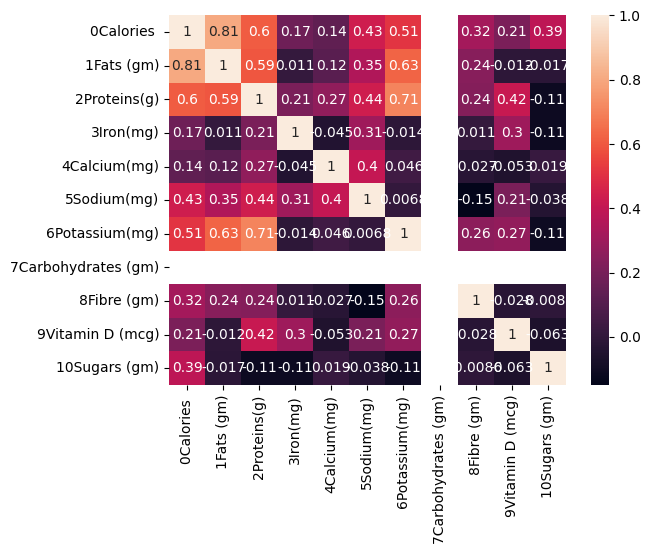

In [8]:
datafin=pd.read_csv('nutrition_distriution.csv')
sns.heatmap(datafin.corr(),annot=True)